### SVM
svm : 강력하고, 선형/비선형 분류/회귀/이상치 탐색에도 사용할 수 ㅇ -> 다목적 머신러닝 모델   
특히 복잡한 분류 문제에 잘 맞고, 작거나 중간 크기의 데이터셋에 적합   
로지스틱 회귀 분류기와 달리 클래스에 대한 확률은 제공 x (LinearSVC의 경우) (그냥 SVC모델은 probability=True로 지정하면, predict_proba 메서드를 제공) 
- 라지마진분류 : 클래스를 나눌 뿐만 아니라 가까운 훈련 샘플로부터 가능한 한 멀리 떨어지도록 결정경계를 구성(그래야 오분류확률 낮출 수 ㅇ)
- 서포트 벡터 : 경계에 가장 가까운 샘플 -> 이에 의해 전적으로 결정경계가 결정됨   
- svm은 scale에 특히 민감함 -> 무조건 포준화 필요   
   
도로의 폭을 가능한 넓게 유지함 vs 마진오류 사이의 균형이 필요 -> 소프트 마짐 분류 사용
- svm에서는 하이퍼파라미터 c를 이용해 균형을 조절 (c값 작아지면 : 도로의 폭 넓어지고, 마진오류도 커짐) -> 과대적합모델은 c를 감소시켜 규제가능

### 5.1 선형 SVM 분류

In [19]:
# 붓꽃데이터 적재, 특성 스케일 변경, Iris-Virginia 감지용 선형 svm 모델 훈련(C=1, 힌지손실함수 적용)

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # 꽃잎 길이, 꽃잎 너비
y = (iris["target"]==2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler", StandardScaler()), # 스케일링 후 
    ("linear_svc", LinearSVC(C=1, loss='hinge')) # 모델 적용하도록 파이프라인 구성
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [20]:
# 모델을 사용해 예측
svm_clf.predict([[5.5, 1.7]])

# 다른 방법 : SVC 모델의 사용 (ex) SVC(kernel='linear', C=1)) -> 큰 훈련셋에 대해서는 속도가 너무 느림
# 다른 방법2: SGDClassifier(loss='hinge', alpha=1/(m*C))와 같이 사용 -> 데이터셋 매우클때, 온라인학습으로 분류문제 다룰때 유용

array([1.])

### 5.2 비선형 SVM 분류

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=2000))])

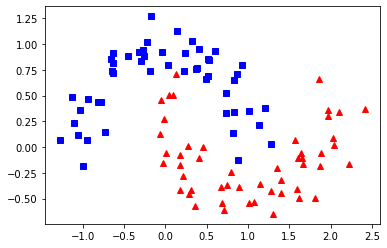

In [51]:
# PolynomialFeatures 변환기 + StandardScaler + LinearSVC를 연결해 구현

from sklearn.datasets import make_moons # 반달 모양 데이터셋을 만드는데에 사용되는 함수
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X, y = make_moons(n_samples = 100, noise=0.15, random_state=42) # 함수 이용해서 데이터 생성

plt.plot(X[y==0,0],X[y==0,1], 'sb') # 생성된 데이터 시각화 
plt.plot(X[y==1,0],X[y==1,1], '^r')

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),# 3차 항까지 생성
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss='hinge', max_iter=2000))
])

polynomial_svm_clf.fit(X,y)

In [52]:
# 5.2.1 다항식 커널
# 커널 트릭을 적용하면 '실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 ㅇ'
# SVC 파이썬 클래스에 구현되어있음

from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='poly', degree=3, coef0=1, C=5)) # coef0 : 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절
])

poly_kernel_svm_clf.fit(X,y)

# 적절한 하이퍼파라미터를 찾는 방법 -> 그리드서치

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])